<a href="https://colab.research.google.com/github/cltl/ma-communicative-robots/blob/master/multimodal/visual-features-check-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone the repo, download the necessary files, etc.

In [1]:
%cd /content
!git clone https://github.com/leolani/cltl-face-all
!cd cltl-face-all/ && pip install .
!pip install omegaconf==2.0.5
!pip install tqdm av

!git clone https://github.com/cltl/ma-communicative-robots.git

# Download the annotations and stuff
!wget https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/train_sent_emo.csv
!wget https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/dev_sent_emo.csv
!wget https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/test_sent_emo.csv

!gdown --id 1U442a03S8D60ojqviwRTiZcwZ_phg6Aj
!gdown --id 1-2LeHC_5Cm2gWWT6vBrVhp8jorbjkN1_

!unzip visual-features.zip

/content
Cloning into 'cltl-face-all'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 157 (delta 32), reused 134 (delta 13), pack-reused 0
Receiving objects: 100% (157/157), 20.01 MiB | 30.85 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Processing /content/cltl-face-all
  Created wheel for cltl-face-all: filename=cltl_face_all-0.0.0-cp36-none-any.whl size=53234 sha256=eb679be67181cc7b86f0253b2ffae5ddb8be4fc13b4d2ed5ea0327f029371917
  Stored in directory: /root/.cache/pip/wheels/8d/71/f3/2db0b17856a0b395aaa04c8562716e0350cfc712cdd4b9947e
Successfully built cltl-face-all
     |████████████████████████████████| 276kB 7.7MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=84aaf0e71fd70e176355a1df68c6e2d9485c137bc72f18deb34bcb349cfeae03
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b2

# Randomly select a video and play it

In [5]:
VISUAL_FEATURES_PATH = 'visual-features/'
VIDEOS_PATH = "ma-communicative-robots/multimodal/smaller-dataset/"

from glob import glob
import random
import os
import json

DATASET_PATH = 'datasets.json'

with open(DATASET_PATH, 'r') as stream:
    datasets = json.load(stream)

for DATASIZE in ['small', 'medium', 'large']:
    for DATASET in ['train', 'dev', 'test']:
        datasets[DATASIZE][DATASET] ={diauttmp4.split('.mp4')[0] : annot for (diauttmp4, annot) in datasets[DATASIZE][DATASET]}


diautt = random.choice([foo for foo, bar in datasets['small']['train'].items()])
annot = datasets['small']['train'][diautt]
features_path = os.path.join(VISUAL_FEATURES_PATH, diautt) + '.npy'

import numpy as np
import av

features = np.load(features_path, allow_pickle=True)
# below line is necessary since the saved file is actually a dictionary.
features = features.item()

vid_path = os.path.join(VIDEOS_PATH, diautt) +  '.mp4'
container = av.open(vid_path)

print(vid_path)

print(annot)

frames = {}
for frame in container.decode(video=0):
    idx = frame.index
    numpy_RGB = np.array(frame.to_image())
    frames[idx] = numpy_RGB

assert np.abs(len(frames) - len(features)) <= 1

import matplotlib.pyplot as plt
import cv2

def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=0.8, thickness=1):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)


import random

from IPython.display import HTML
from base64 import b64encode
mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=1280 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


ma-communicative-robots/multimodal/smaller-dataset/dia111_utt7.mp4
{'speaker': 'Joey', 'emotion': 'neutral', 'sentiment': 'neutral', 'Utterance': 'Don’t worry about that man, that happens.'}


# Randomly select a frame and check it

1


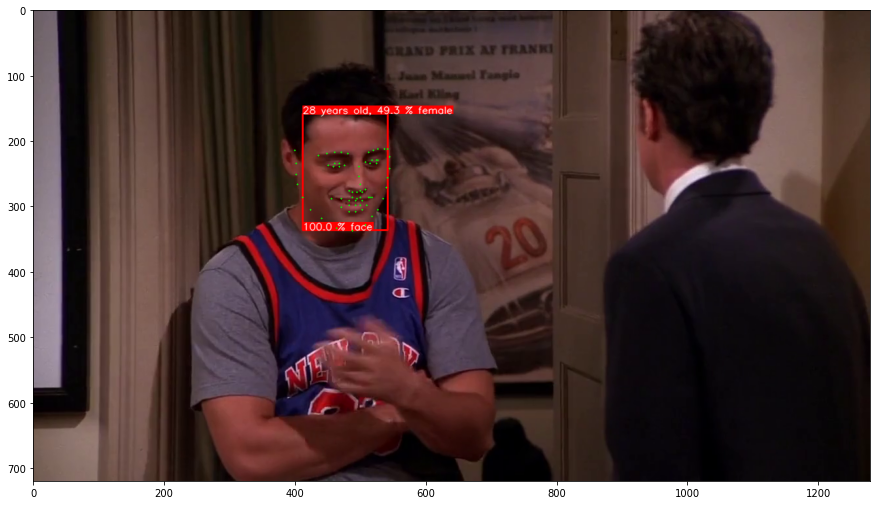

speaker 	 Joey
emotion 	 neutral
sentiment 	 neutral
Utterance 	 Don’t worry about that man, that happens.


In [6]:
idx = random.choice(list(frames.keys()))
img = frames[idx]
print(idx)

feature = features[idx]

for feat in feature:
    bbox = feat['bbox']
    landmark = feat['landmark']
    age = feat['age']
    gender = feat['gender']
    embedding = feat['embedding']
    # face = feat['face']

    x1, y1, x2, y2, prob = bbox
    
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    label = f"{str(round(prob*100, 1))} % face"
    draw_label(img, (x1, y2), label, font_scale=0.5, thickness=1)

    for lm in landmark:
        cv2.circle(img, (int(lm[0]), int(lm[1])), 1, (0,255,0), -1)

    label = f"{int(age)} years old, {str(round(gender*100, 1))} % female"
    draw_label(img, (x1, y1), label, font_scale=0.5, thickness=1)
    
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

for key, val in annot.items():
    print(key, '\t', val)